In [127]:
%matplotlib inline
import numpy as np
import pandas as pd
import os, glob
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.fftpack
import scipy.stats

In [128]:
file_path = r'D:\Stations_data\Stations_data\Bani\all_months_copy'
os.chdir(file_path)

In [129]:
df1 = pd.read_csv('till_january.csv', sep = ',') #arse_dates = 'date')

df1['date'] = pd.to_datetime(df1.date, format = '%d.%m.%Y %H:%M:%S')
df1.set_index('date', inplace = True)
df1_1hr = df1.resample('60min').mean()
df1_1day = df1.resample('1440min').mean()

In [130]:
df2 = pd.read_csv('Rainfall_data_new.csv', sep = ',')
df2['Date & Time'] = pd.to_datetime(df2['Date & Time'])#, format = "%d/%m/%Y - %H:%M:%S")
df2 = df2.set_index('Date & Time')
df2_1hr = df2.resample('60min').mean()
df2_1hr = df2_1hr.fillna(0.0)
df2_1hr.shape

(7998, 3)

In [131]:
df3 = pd.read_csv('Temp_Rain_Bani.csv', sep = ',')
df3['Date & Time'] = pd.to_datetime(df3['Date & Time'], format = "%d/%m/%Y - %H:%M:%S")
df3 = df3.set_index('Date & Time')
df3_1hr = df3.resample('60min').mean()
# df3_1hr.head()

In [132]:
# # Pre-Monsoon
# date_mask1 = (df1_1hr.index >= '2020-04-13') & (df1_1hr.index < '2020-04-17')
# date_mask2 = (df2_1hr.index >= '2020-04-13') & (df2_1hr.index < '2020-04-17')
# date_mask3 = (df3_1hr.index >= '2020-04-13') & (df3_1hr.index < '2020-04-17')

# # Monsoon
# date_mask1 = (df1_1hr.index >= '2020-07-01') & (df1_1hr.index < '2020-07-07')
# date_mask2 = (df2_1hr.index >= '2020-07-01') & (df2_1hr.index < '2020-07-07')
# date_mask3 = (df3_1hr.index >= '2020-07-01') & (df3_1hr.index < '2020-07-07')

# # Post-Monsoon
# date_mask1 = (df1_1hr.index >= '2020-10-08') & (df1_1hr.index < '2020-10-14')
# date_mask2 = (df2_1hr.index >= '2020-10-08') & (df2_1hr.index < '2020-10-14')
# date_mask3 = (df3_1hr.index >= '2020-10-08') & (df3_1hr.index < '2020-10-14')

# # Winter
date_mask1 = (df1_1hr.index >= '2020-12-20') & (df1_1hr.index < '2020-12-26')
date_mask2 = (df2_1hr.index >= '2020-12-20') & (df2_1hr.index < '2020-12-26')
date_mask3 = (df3_1hr.index >= '2020-12-20') & (df3_1hr.index < '2020-12-26')

In [133]:
# date_mask1 = (df1_1hr.index >= '2020-12-20') & (df1_1hr.index < '2020-12-26')
# date_mask2 = (df2_1hr.index >= '2020-12-20') & (df2_1hr.index < '2020-12-26')
# date_mask3 = (df3_1hr.index >= '2020-12-20') & (df3_1hr.index < '2020-12-26')
dfs = [df1_1hr, df2_1hr, df3_1hr]

# Extracting the desired slice of Time-Series (Soil-Moisture)
SM_sensor1 = df1_1hr['S1SM'].loc[date_mask1]
SM_sensor2 = df1_1hr['S2SM'].loc[date_mask1]
SM_sensor3 = df1_1hr['S3SM'].loc[date_mask1]
SM_sensor4 = df1_1hr['S4SM'].loc[date_mask1]
SM_sensor5 = df1_1hr['S5SM'].loc[date_mask1]
SM_sensor6 = df1_1hr['S6SM'].loc[date_mask1]
SM_sensor7 = df1_1hr['S7SM'].loc[date_mask1]
SM_sensor8 = df1_1hr['S8SM'].loc[date_mask1]
SM_sensor9 = df1_1hr['S9SM'].loc[date_mask1]
SM_sensor10 = df1_1hr['S10SM'].loc[date_mask1]

# Extracting the desired slice of Time-Series (Soil-Temperature)
ST_sensor1 = df1_1hr['S1Temp'].loc[date_mask1]
ST_sensor2 = df1_1hr['S2Temp'].loc[date_mask1]
ST_sensor3 = df1_1hr['S3Temp'].loc[date_mask1]
ST_sensor4 = df1_1hr['S4Temp'].loc[date_mask1]
ST_sensor5 = df1_1hr['S5Temp'].loc[date_mask1]
ST_sensor6 = df1_1hr['S6Temp'].loc[date_mask1]
ST_sensor7 = df1_1hr['S7Temp'].loc[date_mask1]
ST_sensor8 = df1_1hr['S8Temp'].loc[date_mask1]
ST_sensor9 = df1_1hr['S9Temp'].loc[date_mask1]
ST_sensor10 = df1_1hr['S10Temp'].loc[date_mask1]

# Extracting the desired slice of Time-Series (Rain-Fall)
Rainfall = df2_1hr['Int_Rainfall (mm)'].loc[date_mask2]

# Extracting the desired slice of Time-Series (Air-Temperature)
Air_Temp = df3_1hr['Temp (0C)'].loc[date_mask3]

In [134]:
print("Sensor1 NaN counts:",SM_sensor1.isnull().sum())
print("Sensor2 NaN counts:",SM_sensor2.isnull().sum())
print("Sensor3 NaN counts:",SM_sensor3.isnull().sum())
print("Sensor4 NaN counts:",SM_sensor4.isnull().sum())
print("Sensor5 NaN counts:",SM_sensor5.isnull().sum())
print("Sensor6 NaN counts:",SM_sensor6.isnull().sum())
print("Sensor7 NaN counts:",SM_sensor7.isnull().sum())
print("Sensor8 NaN counts:",SM_sensor8.isnull().sum())
print("Sensor9 NaN counts:",SM_sensor9.isnull().sum())
print("Sensor10 NaN counts:",SM_sensor10.isnull().sum())
print("Air Temp. NaN counts:",Air_Temp.isnull().sum())

Sensor1 NaN counts: 8
Sensor2 NaN counts: 6
Sensor3 NaN counts: 6
Sensor4 NaN counts: 6
Sensor5 NaN counts: 6
Sensor6 NaN counts: 6
Sensor7 NaN counts: 6
Sensor8 NaN counts: 6
Sensor9 NaN counts: 140
Sensor10 NaN counts: 6
Air Temp. NaN counts: 0


In [135]:
SM_sensor1.shape

(144,)

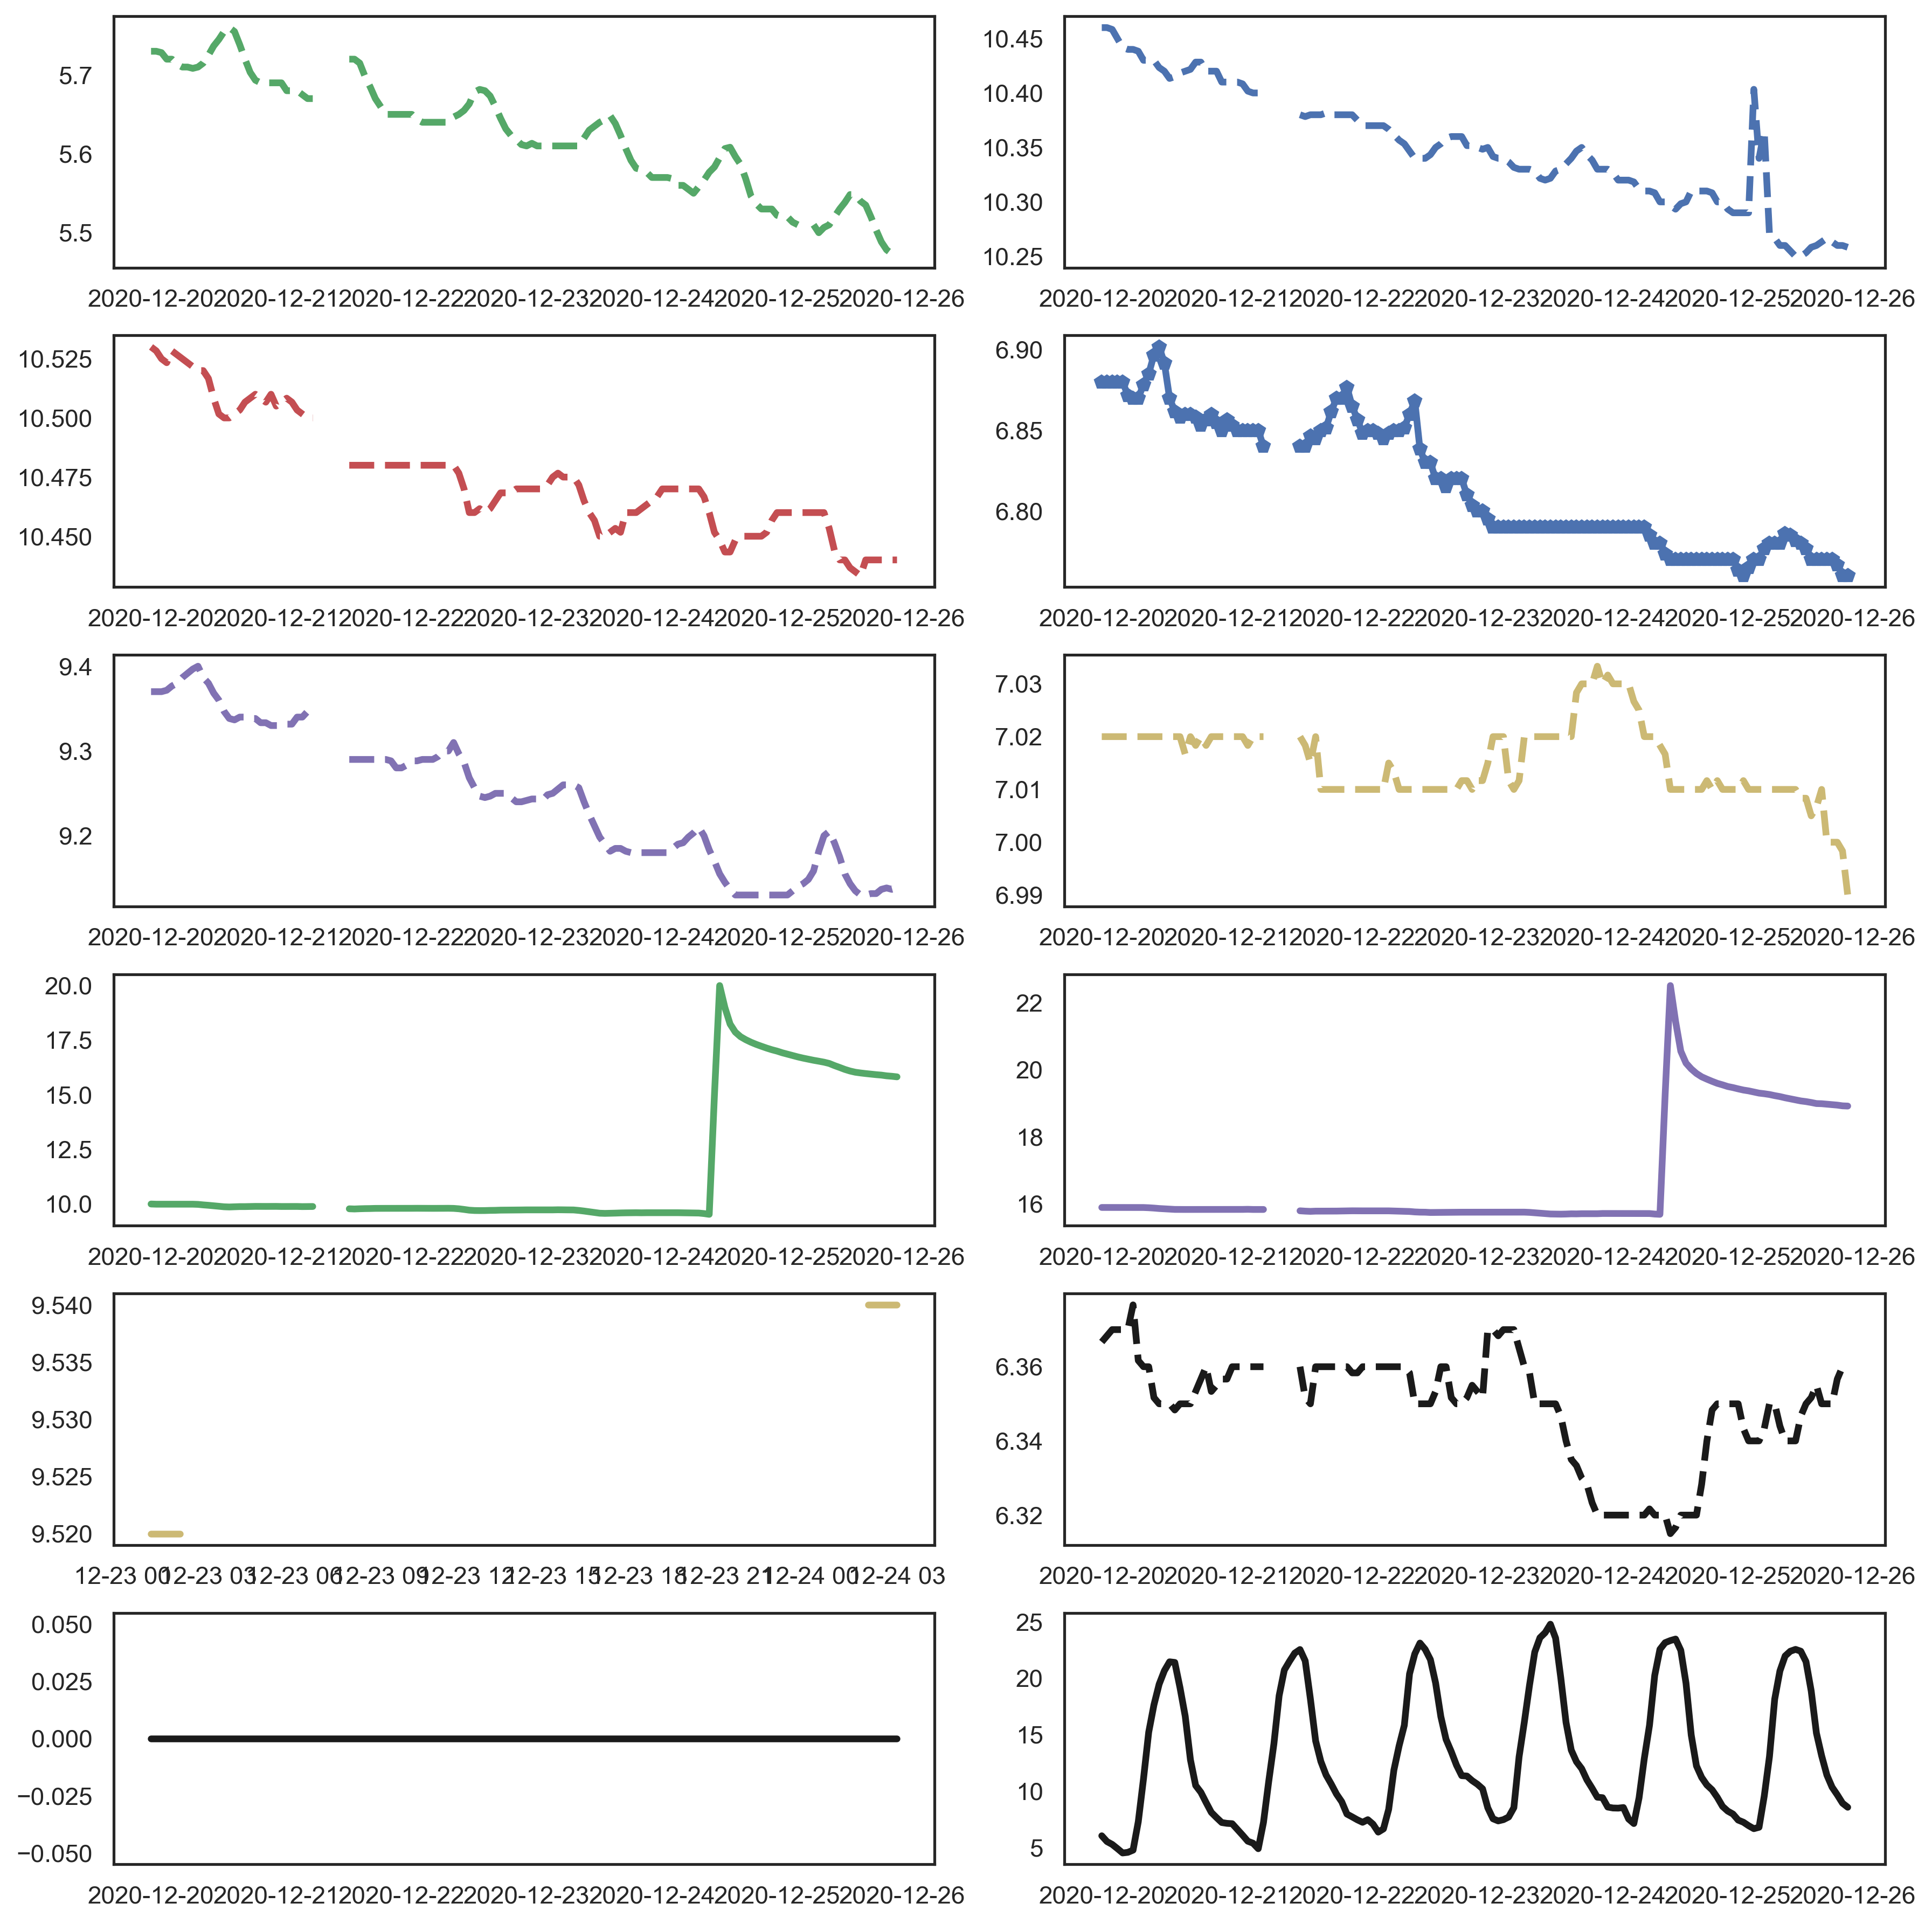

In [136]:
fig, ax = plt.subplots(6, 2, figsize = (12, 12), dpi = 300)
ax[0,0].plot(SM_sensor1, 'g--', label = 'Sensor-1')
ax[0,1].plot(SM_sensor2, 'b--', label = 'Sensor-2')
ax[1,0].plot(SM_sensor3, 'r--', label = 'Sensor-3')
ax[1,1].plot(SM_sensor4, 'p-', label = 'Sensor-4')
ax[2,0].plot(SM_sensor5, 'm--', label = 'Sensor-5')
ax[2,1].plot(SM_sensor6, 'y--', label = 'Sensor-6')
ax[3,0].plot(SM_sensor7, 'g-', label = 'Sensor-7')
ax[3,1].plot(SM_sensor8, 'm-', label = 'Sensor-8')
ax[4,0].plot(SM_sensor9, 'y-', label = 'Sensor-9')
ax[4,1].plot(SM_sensor10, 'k--', label = 'Sensor-10')
ax[5,0].plot(Rainfall, 'k', label = 'Rainfall')
ax[5,1].plot(Air_Temp, 'k', label = 'Rainfall')
plt.tight_layout()
# ax[0,1,2,3,4,5,6].legend();

In [137]:
SM_sensor1 = SM_sensor1.interpolate(method= 'quadratic')
SM_sensor2 = SM_sensor2.interpolate(method= 'quadratic')
SM_sensor3 = SM_sensor3.interpolate(method= 'quadratic')
SM_sensor4 = SM_sensor4.interpolate(method= 'quadratic')
SM_sensor5 = SM_sensor5.interpolate(method= 'quadratic')
SM_sensor6 = SM_sensor6.interpolate(method= 'quadratic')
SM_sensor7 = SM_sensor7.interpolate(method= 'quadratic')
SM_sensor8 = SM_sensor8.interpolate(method= 'quadratic')
# SM_sensor9 = SM_sensor9.interpolate(method= 'quadratic')
SM_sensor10 = SM_sensor10.interpolate(method= 'quadratic')

ST_sensor1 = ST_sensor1.interpolate(method= 'quadratic')
ST_sensor2 = ST_sensor2.interpolate(method= 'quadratic')
ST_sensor3 = ST_sensor3.interpolate(method= 'quadratic')
ST_sensor4 = ST_sensor4.interpolate(method= 'quadratic')
ST_sensor5 = ST_sensor5.interpolate(method= 'quadratic')
ST_sensor6 = ST_sensor6.interpolate(method= 'quadratic')
ST_sensor7 = ST_sensor7.interpolate(method= 'quadratic')
ST_sensor8 = ST_sensor8.interpolate(method= 'quadratic')
# ST_sensor9 = ST_sensor9.interpolate(method= 'quadratic')
ST_sensor10 = ST_sensor10.interpolate(method= 'quadratic')
# Air_Temp = Air_Temp.interpolate(method= 'quadratic')

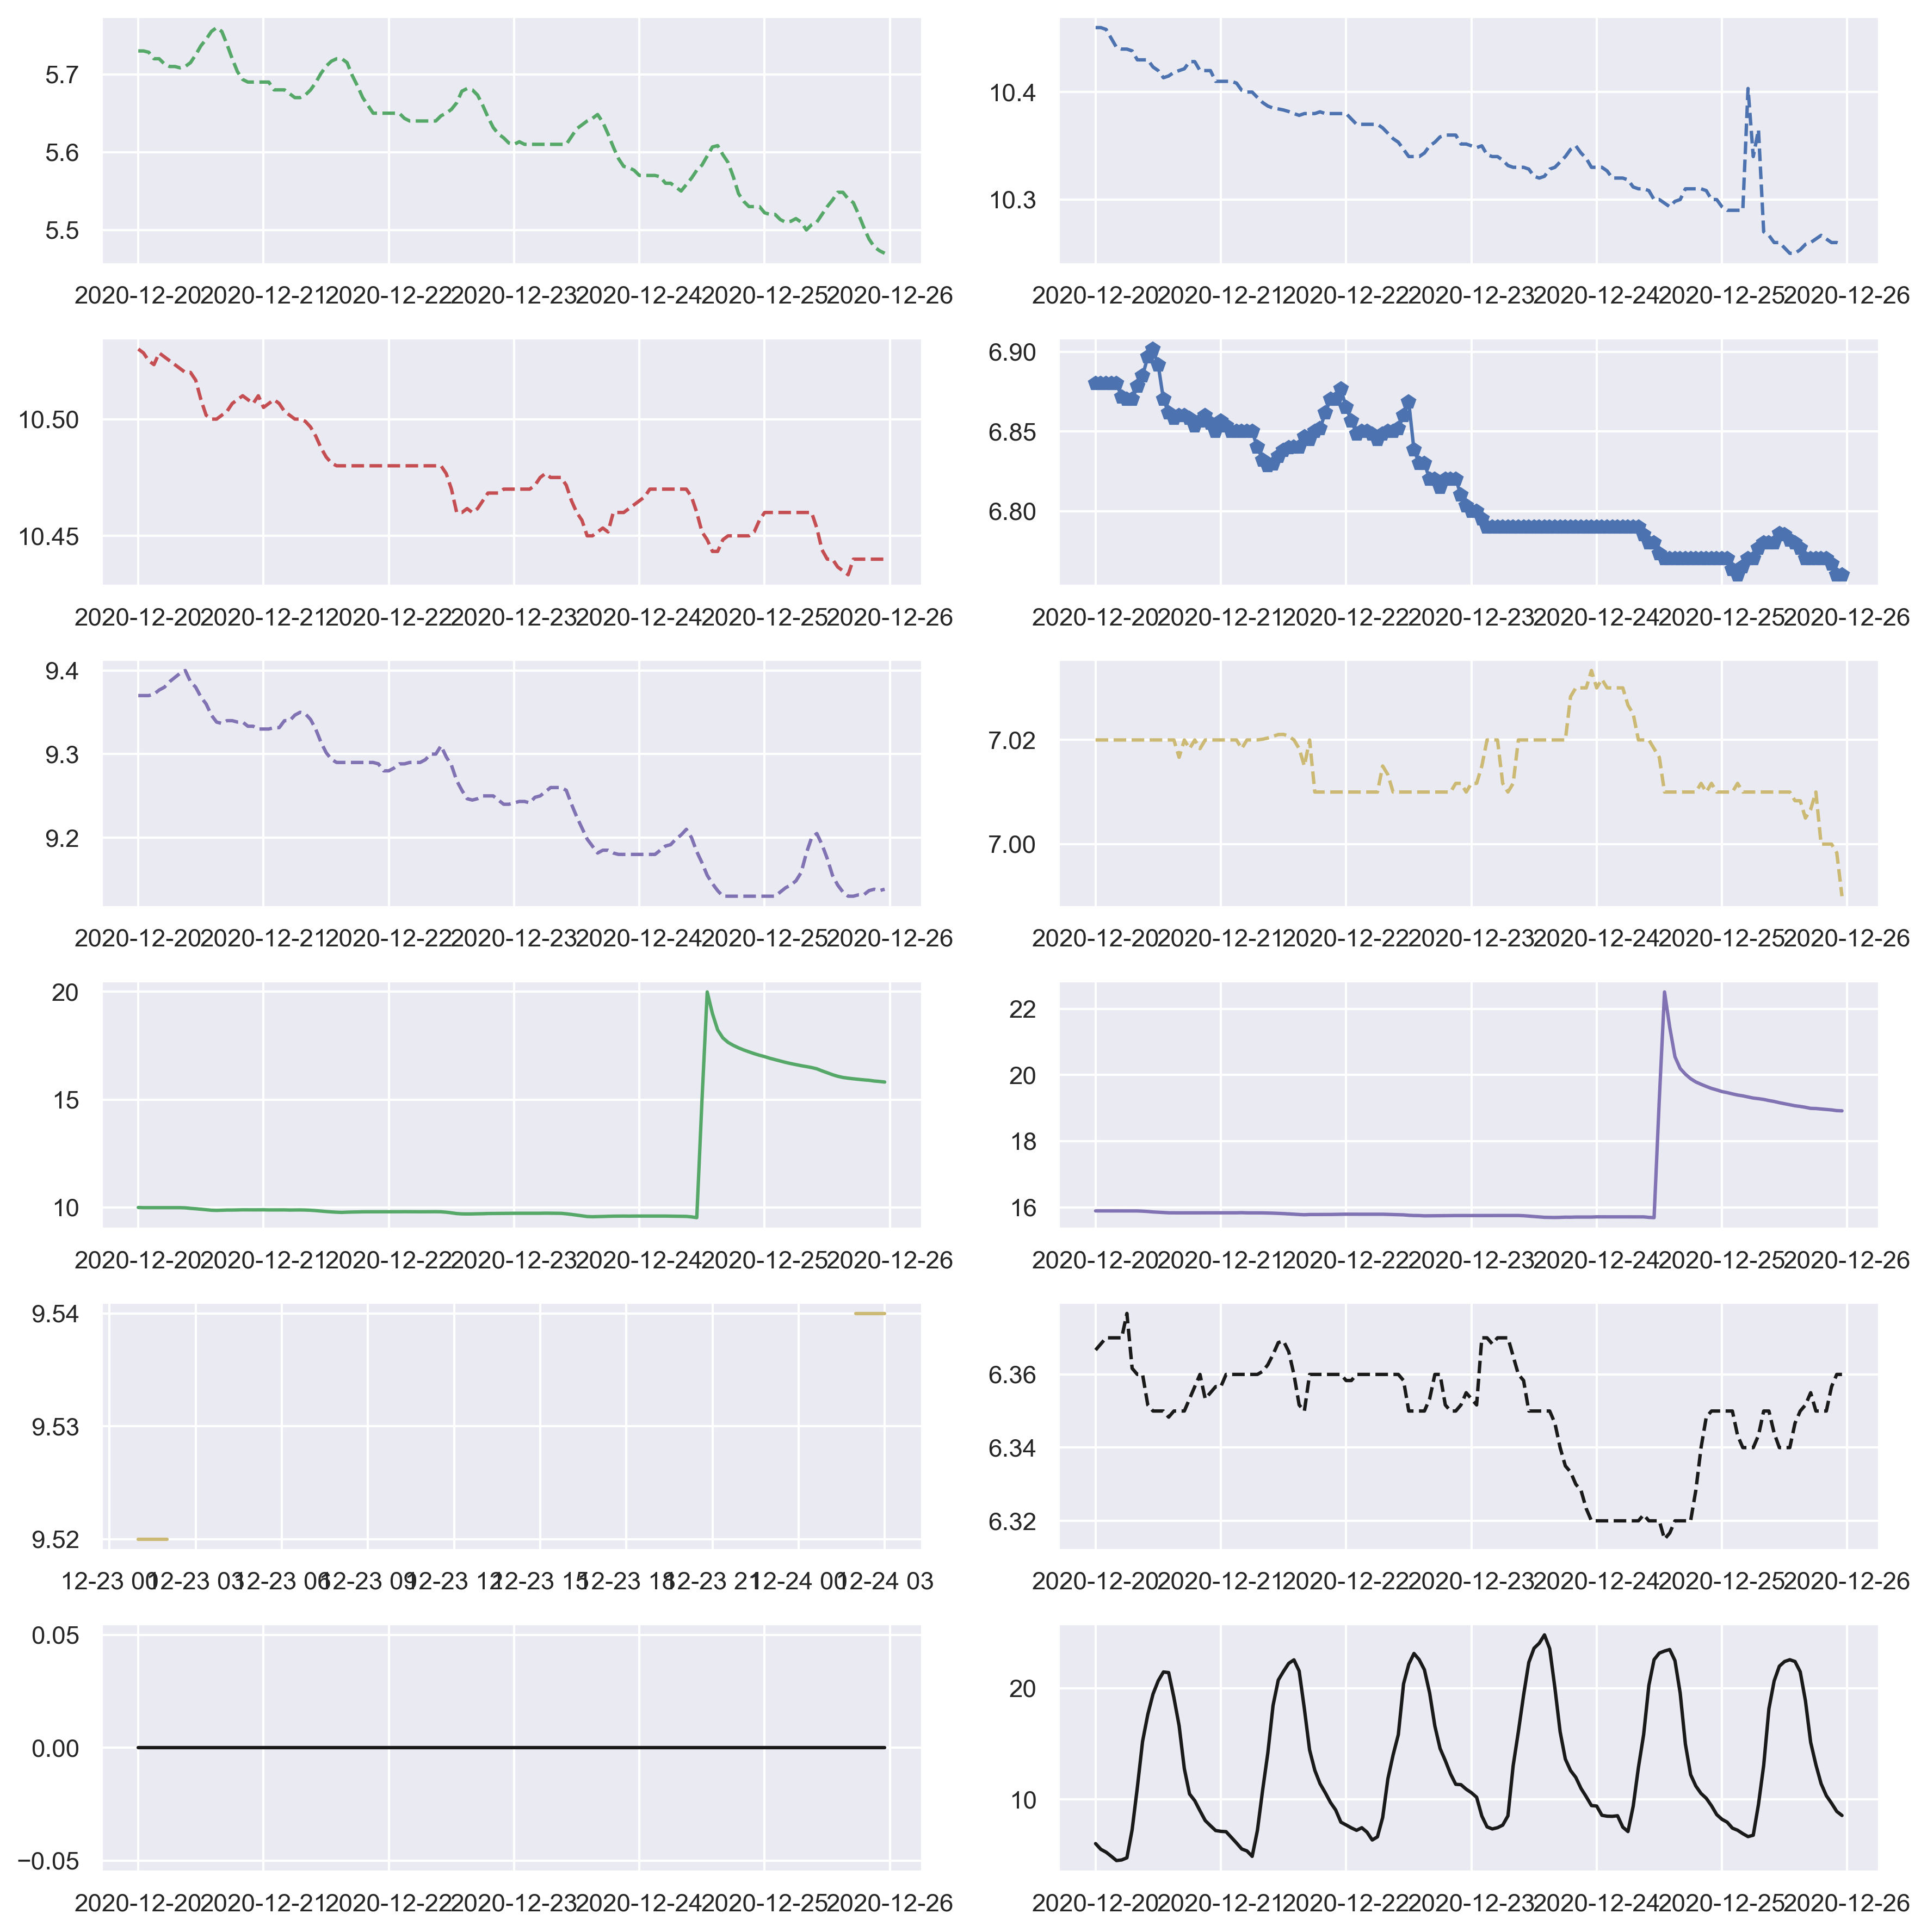

In [138]:
sns.set()
fig, ax1 = plt.subplots(6, 2, figsize = (12, 12), dpi = 300)
ax1[0,0].plot(SM_sensor1, 'g--', label = 'Sensor-1')
ax1[0,1].plot(SM_sensor2, 'b--', label = 'Sensor-2')
ax1[1,0].plot(SM_sensor3, 'r--', label = 'Sensor-3')
ax1[1,1].plot(SM_sensor4, 'p-', label = 'Sensor-4')
ax1[2,0].plot(SM_sensor5, 'm--', label = 'Sensor-5')
ax1[2,1].plot(SM_sensor6, 'y--', label = 'Sensor-6')
ax1[3,0].plot(SM_sensor7, 'g-', label = 'Sensor-7')
ax1[3,1].plot(SM_sensor8, 'm-', label = 'Sensor-8')
ax1[4,0].plot(SM_sensor9, 'y-', label = 'Sensor-9')
ax1[4,1].plot(SM_sensor10, 'k--', label = 'Sensor-10')
ax1[5,0].plot(Rainfall, 'k', label = 'Rainfall')
ax1[5,1].plot(Air_Temp, 'k', label = 'Rainfall')
plt.tight_layout()
# ax[0,1,2,3,4,5,6].legend();

In [139]:
print('Sensor1_ST: \n', ST_sensor1.describe())
print('Sensor2_ST: \n', ST_sensor2.describe())
print('Sensor3_ST: \n', ST_sensor3.describe())
print('Sensor4_ST: \n', ST_sensor4.describe())
print('Sensor5_ST: \n', ST_sensor5.describe())
print('Sensor6_ST: \n', ST_sensor6.describe())
print('Sensor7_ST: \n', ST_sensor7.describe())
print('Sensor8_ST: \n', ST_sensor8.describe())
print('Sensor9_ST: \n', ST_sensor9.describe())
print('Sensor10_ST: \n', ST_sensor10.describe())
print('Air Temperature: \n', Air_Temp.describe())

Sensor1_ST: 
 count    144.000000
mean      14.884859
std        1.992934
min       11.537833
25%       13.170375
50%       14.577000
75%       16.681779
max       18.687500
Name: S1Temp, dtype: float64
Sensor2_ST: 
 count    144.000000
mean      15.863544
std        0.488453
min       15.026167
25%       15.429333
50%       15.913333
75%       16.257708
max       16.804667
Name: S2Temp, dtype: float64
Sensor3_ST: 
 count    144.000000
mean      17.204629
std        0.178671
min       16.937667
25%       17.077792
50%       17.174500
75%       17.296000
max       17.722667
Name: S3Temp, dtype: float64
Sensor4_ST: 
 count    144.000000
mean      19.460465
std        0.301077
min       19.089667
25%       19.210542
50%       19.349667
75%       19.657167
max       20.119667
Name: S4Temp, dtype: float64
Sensor5_ST: 
 count    144.000000
mean      18.136545
std        0.218982
min       17.864667
25%       17.975000
50%       18.077500
75%       18.174250
max       18.760333
Name: S5Temp, 

In [140]:
print('Sensor1_SM: \n', SM_sensor1.describe())
print('Sensor2_SM: \n', SM_sensor2.describe())
print('Sensor3_SM: \n', SM_sensor3.describe())
print('Sensor4_SM: \n', SM_sensor4.describe())
print('Sensor5_SM: \n', SM_sensor5.describe())
print('Sensor6_SM: \n', SM_sensor6.describe())
print('Sensor7_SM: \n', SM_sensor7.describe())
print('Sensor8_SM: \n', SM_sensor8.describe())
print('Sensor9_SM: \n', SM_sensor9.describe())
print('Sensor10_SM: \n', SM_sensor10.describe())

Sensor1_SM: 
 count    144.000000
mean       5.624483
std        0.072818
min        5.470000
25%        5.568333
50%        5.636667
75%        5.680417
max        5.760000
Name: S1SM, dtype: float64
Sensor2_SM: 
 count    144.000000
mean      10.350708
std        0.053268
min       10.250000
25%       10.310000
50%       10.349167
75%       10.384514
max       10.460000
Name: S2SM, dtype: float64
Sensor3_SM: 
 count    144.000000
mean      10.474885
std        0.024136
min       10.433333
25%       10.460000
50%       10.470000
75%       10.484755
max       10.530000
Name: S3SM, dtype: float64
Sensor4_SM: 
 count    144.000000
mean       6.816634
std        0.039515
min        6.760000
25%        6.784167
50%        6.801667
75%        6.850000
max        6.901667
Name: S4SM, dtype: float64
Sensor5_SM: 
 count    144.000000
mean       9.246649
std        0.081419
min        9.130000
25%        9.180000
50%        9.249167
75%        9.311042
max        9.400000
Name: S5SM, dtype: flo

### PLOTS 

In [141]:
S1_moisture = SM_sensor1.values
S2_moisture = SM_sensor2.values
S3_moisture = SM_sensor3.values
S4_moisture = SM_sensor4.values
S5_moisture = SM_sensor5.values
S6_moisture = SM_sensor6.values
S7_moisture = SM_sensor7.values
S8_moisture = SM_sensor8.values
S9_moisture = SM_sensor9.values
S10_moisture = SM_sensor10.values

In [142]:
S1_temp = ST_sensor1.values
S2_temp = ST_sensor2.values
S3_temp = ST_sensor3.values
S4_temp = ST_sensor4.values
S5_temp = ST_sensor5.values
S6_temp = ST_sensor6.values
S7_temp = ST_sensor7.values
S8_temp = ST_sensor8.values
S9_temp = ST_sensor9.values
S10_temp = ST_sensor10.values
Air_temp = Air_Temp.values

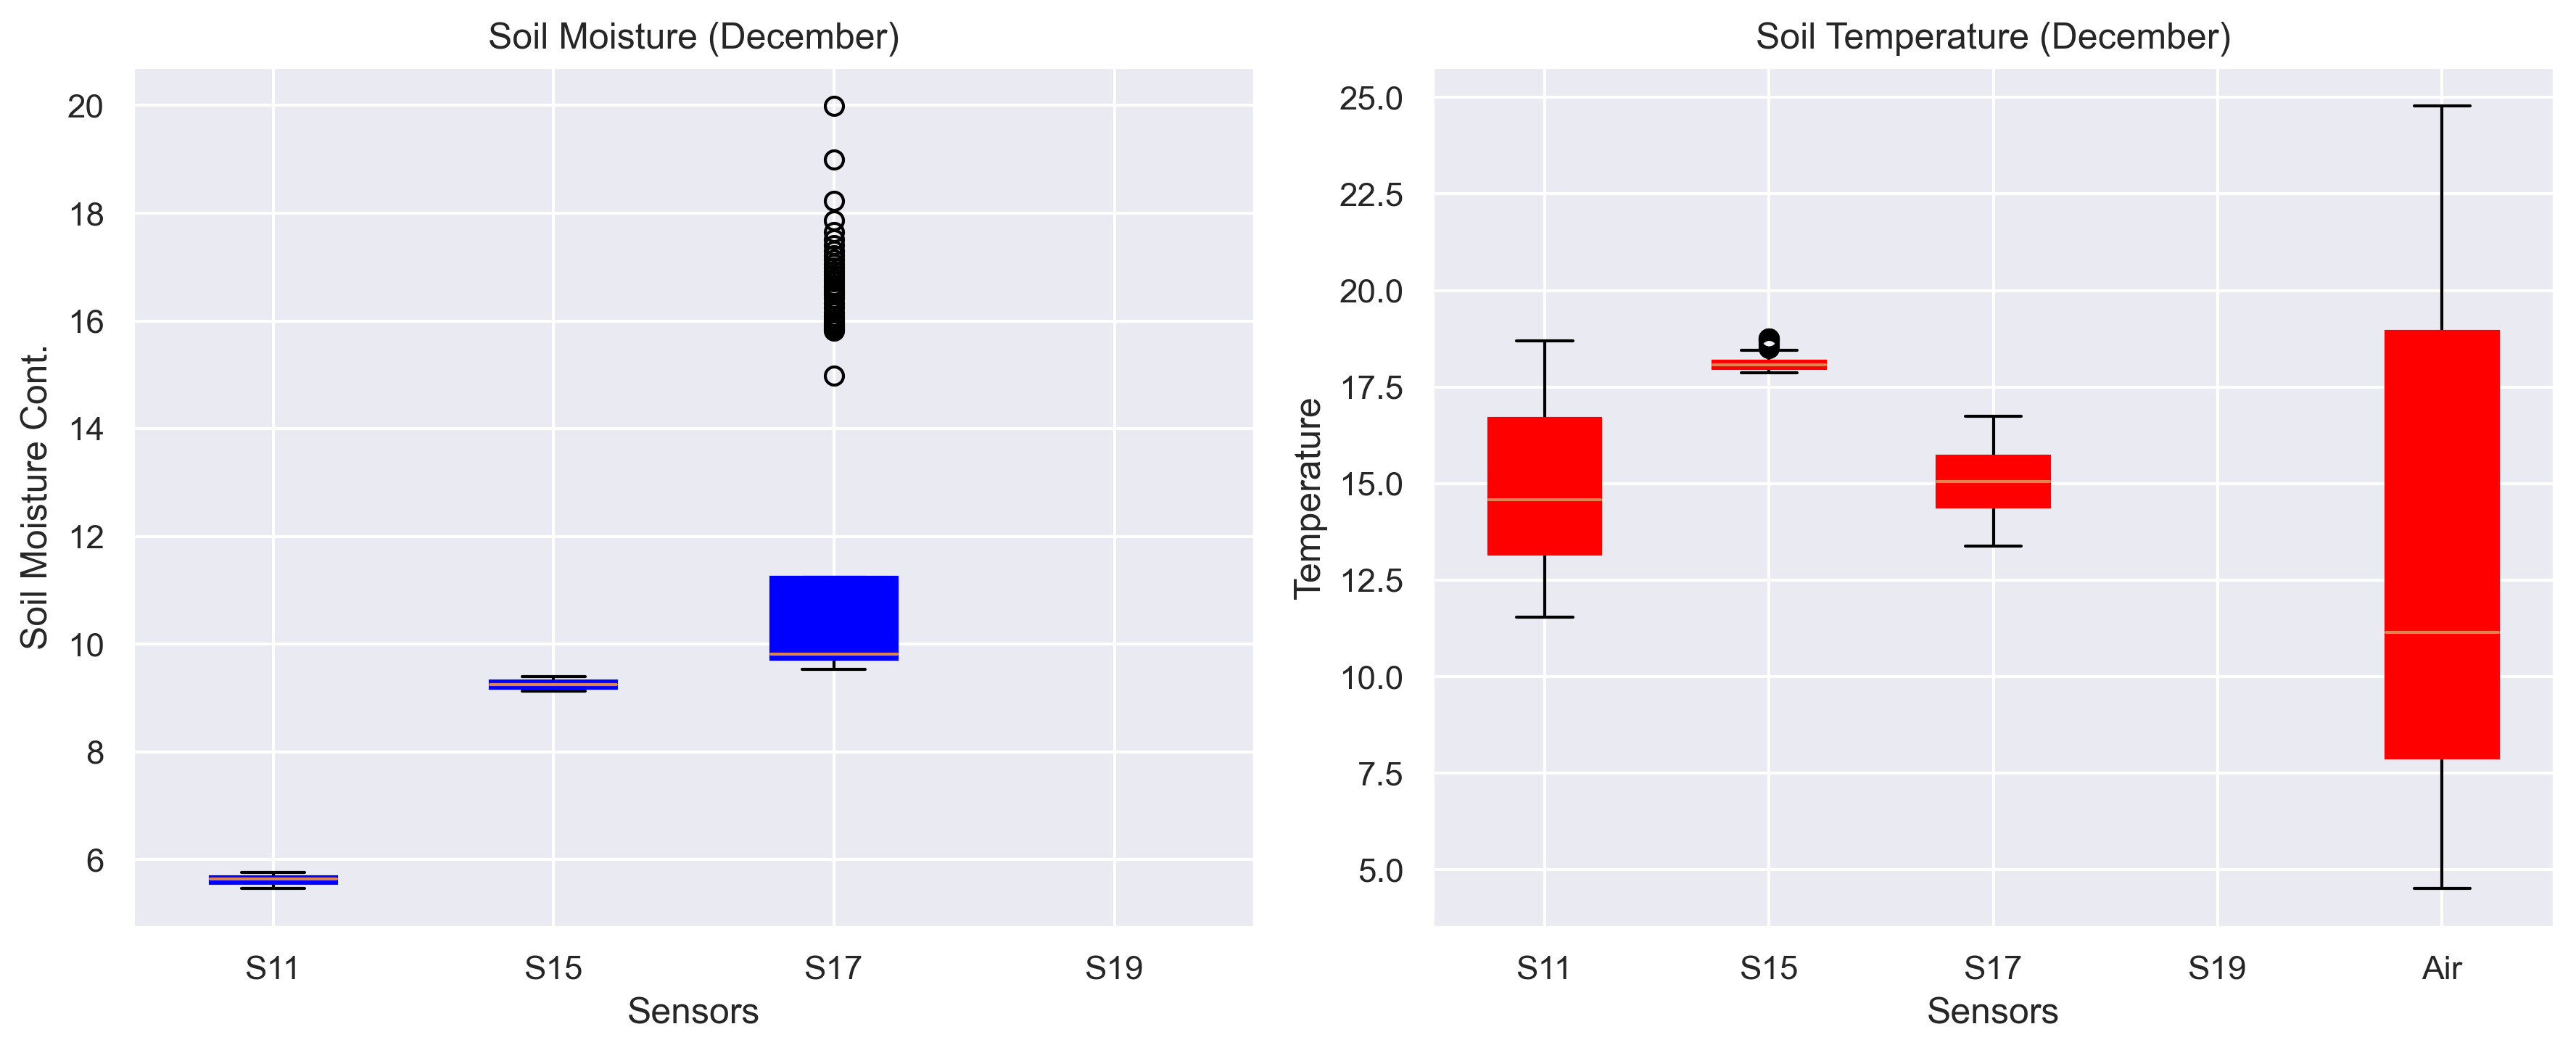

In [143]:
c1 = "blue"
c2 = "red"
c3 = "magenta"
labelsm = ["S11", "S15", "S17", "S19"]
labelst = ["S11", "S15", "S17", "S19", 'Air']

# label2 = "Air"

fig, axes = plt.subplots(1, 2, figsize = (12, 5), dpi = 300)
SM_data = [S1_moisture, S5_moisture, S7_moisture, S9_moisture]
ST_data = [S1_temp, S5_temp, S7_temp, S9_temp, Air_temp]
# bba = axes[1].twinx()
# fig.subtitle("Descriptive Statistical Analysis")
axes[0].set_title('Soil Moisture (December)')
axes[0].set_xlabel('Sensors')
axes[0].set_ylabel('Soil Moisture Cont.')
axes[1].set_ylabel('Temperature')
axes[1].set_xlabel('Sensors')
axes[1].set_title('Soil Temperature (December)')
ba = axes[0].boxplot(SM_data, patch_artist=True, labels = labelsm)
bb = axes[1].boxplot(ST_data, patch_artist=True, labels = labelst)
# bc = axes[1].boxplot(Air_temp, patch_artist = True)
# bb = axes[1].boxplot(Air_temp, patch_artist=True)

for box in ba['boxes']:
    box.set(color = c1)
    box.set(facecolor = c1)
for box in bb['boxes']:
    box.set(color = c2)
    box.set(facecolor = c2)
# for box in bc['boxes']:
#     box.set(color = c3)
#     box.set(facecolor = c3)

plt.tight_layout()
# bba.boxplot(Air_temp)
plt.show();

### Depth Profile 

In [144]:
# PRM = Pre-monsoon
# M = Monsoon
# PSM = Post-monsoon
# WTR = Winter
PRM_VC = [['0-5', 1.81, 3.87], ["5-25", 1.14, 9.69], ["25-50", 0.30, 9.98], ["50-80", 0.18, 5.49]]
M_VC = [['0-5', 25.23, 6.66], ["5-25", 4.97, 10.87], ["25-50", 0.25, 8.00], ["50-80", 0.21, 4.80]]
PSM_VC = [['0-5', 1.92, 5.21], ["5-25", 0.78, 11.56], ["25-50", 0.57, 12.00], ["50-80", 0.68, 7.45]]
WTR_VC = [['0-5', 3.13, 5.62], ["5-25", 1.30, 10.35], ["25-50", 0.50, 10.57], ["50-80", 0.67, 6.82]]

In [145]:
Bani_SM_profile_PRM_VC = pd.DataFrame(PRM_VC, columns = ["Depth", "CV", "Mean"])
Bani_SM_profile_M_VC = pd.DataFrame(M_VC, columns = ["Depth", "CV", "Mean"])
Bani_SM_profile_PSM_VC = pd.DataFrame(PSM_VC, columns = ["Depth", "CV", "Mean"])
Bani_SM_profile_WTR_VC = pd.DataFrame(WTR_VC, columns = ["Depth", "CV", "Mean"])

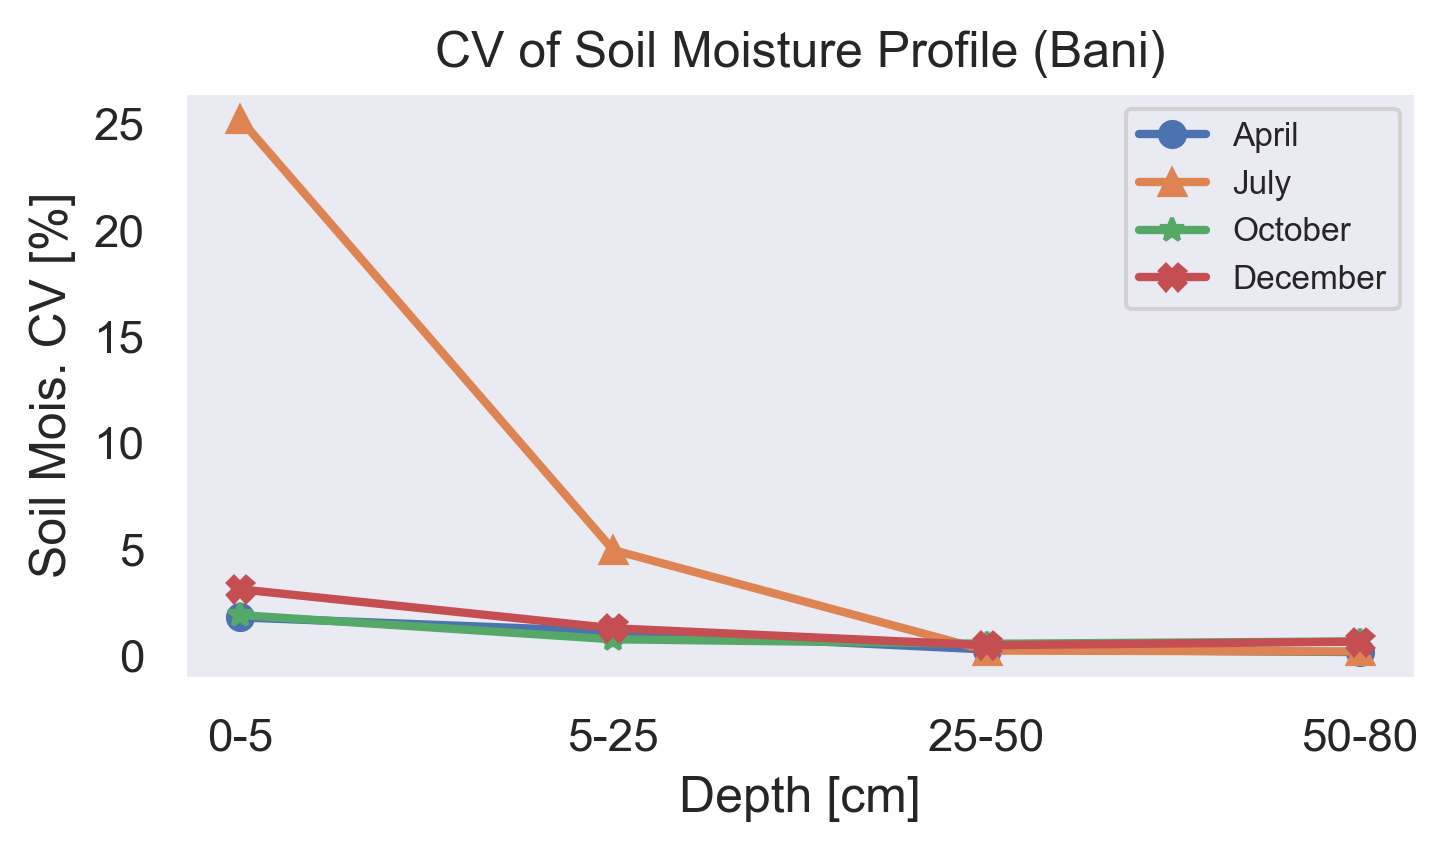

In [146]:
# sns.set(style="white", rc={"lines.linewidth": 3})
plt.figure(figsize = (5, 3), dpi = 300)
plt.plot(Bani_SM_profile_PRM_VC.Depth, Bani_SM_profile_PRM_VC.CV, '-o', lw = 2, label = "April")
plt.plot(Bani_SM_profile_M_VC.Depth, Bani_SM_profile_M_VC.CV, '-^', lw = 2, label = "July")
plt.plot(Bani_SM_profile_PSM_VC.Depth, Bani_SM_profile_PSM_VC.CV, '-*', lw = 2, label = "October")
plt.plot(Bani_SM_profile_WTR_VC.Depth, Bani_SM_profile_WTR_VC.CV, '-X', lw = 2, label = "December")
plt.xlabel('Depth [cm]')
plt.ylabel('Soil Mois. CV [%]')
plt.title('CV of Soil Moisture Profile (Bani)')
plt.grid()
plt.tight_layout()
plt.legend(prop={'size': 8});

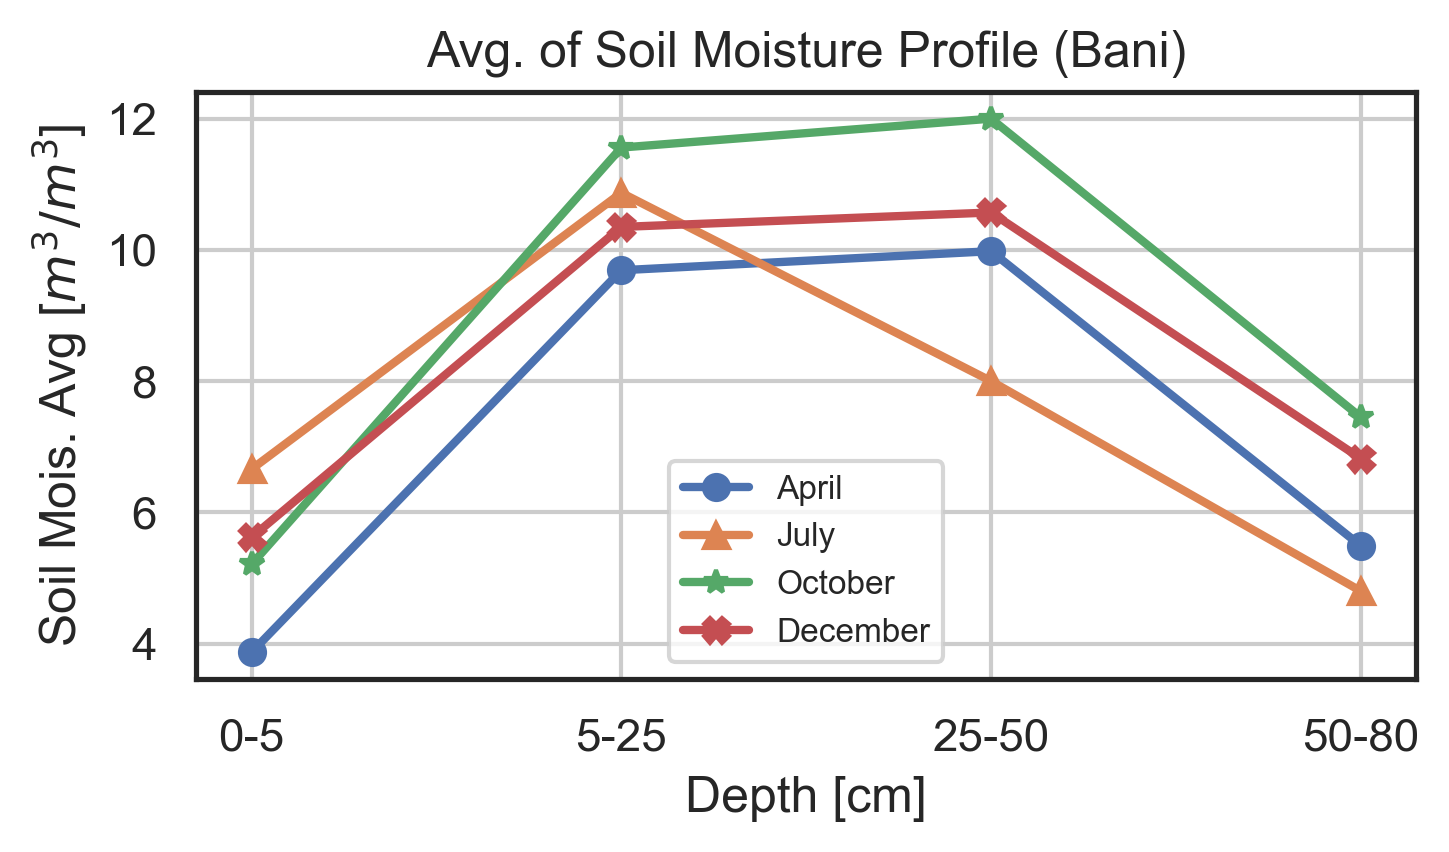

In [147]:
sns.set(style="white", rc={"lines.linewidth": 3})
plt.figure(figsize = (5, 3), dpi = 300)
plt.plot(Bani_SM_profile_PRM_VC.Depth, Bani_SM_profile_PRM_VC.Mean, '-o', lw = 2, label = "April")
plt.plot(Bani_SM_profile_M_VC.Depth, Bani_SM_profile_M_VC.Mean, '-^', lw = 2, label = "July")
plt.plot(Bani_SM_profile_PSM_VC.Depth, Bani_SM_profile_PSM_VC.Mean, '-*', lw = 2, label = "October")
plt.plot(Bani_SM_profile_WTR_VC.Depth, Bani_SM_profile_WTR_VC.Mean, '-X', lw = 2, label = "December")
plt.xlabel('Depth [cm]')
plt.ylabel('Soil Mois. Avg [$m^3/m^3$]')
plt.title('Avg. of Soil Moisture Profile (Bani)')
plt.grid()
plt.tight_layout()
plt.legend(prop={'size': 8});

In [148]:
ST_PRM = [['0-5', 9.11, 29.54], ["5-25", 2.08, 27.44], ["25-50", 0.81, 25.94], ["50-80", 0.87, 24.22]]
ST_M = [['0-5', 4.24, 31.84], ["5-25", 1.69, 31.36], ["25-50", 1.04, 30.82], ["50-80", 0.60, 29.81]]
ST_PSM = [['0-5', 8.68, 29.84], ["5-25", 2.08, 29.28], ["25-50", 0.44, 29.22], ["50-80", 0.31, 29.23]]
ST_WTR = [['0-5', 13.37, 14.88], ["5-25", 3.09, 15.86], ["25-50", 1.05, 17.20], ["50-80", 1.54, 19.46]]

In [149]:
Bani_ST_profile_PRM = pd.DataFrame(ST_PRM, columns = ["Depth", "VC", "Mean"])
Bani_ST_profile_M = pd.DataFrame(ST_M, columns = ["Depth", "VC", "Mean"])
Bani_ST_profile_PSM = pd.DataFrame(ST_PSM, columns = ["Depth", "VC", "Mean"])
Bani_ST_profile_WTR = pd.DataFrame(ST_WTR, columns = ["Depth", "VC", "Mean"])

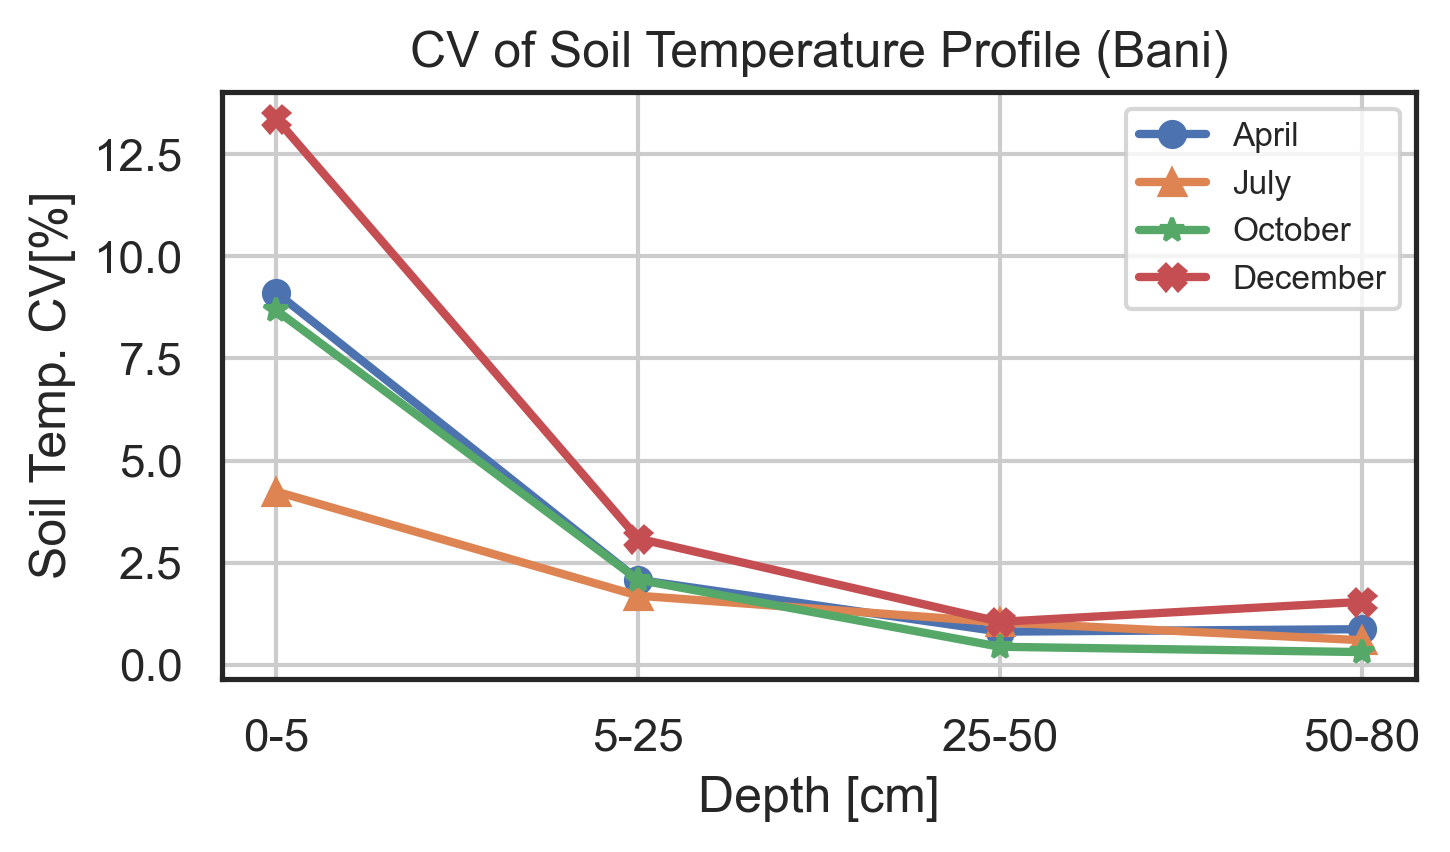

In [150]:
plt.figure(figsize = (5, 3), dpi = 300)
plt.plot(Bani_ST_profile_PRM.Depth, Bani_ST_profile_PRM.VC,'-o', lw = 2,
         label = 'April')
plt.plot(Bani_ST_profile_M.Depth, Bani_ST_profile_M.VC,'-^', lw = 2,
         label = 'July')
plt.plot(Bani_ST_profile_PSM.Depth, Bani_ST_profile_PSM.VC, '-*', lw = 2, 
        label = 'October')
plt.plot(Bani_ST_profile_WTR.Depth, Bani_ST_profile_WTR.VC, '-X', lw = 2,
         label = 'December')
plt.xlabel('Depth [cm]')
plt.ylabel('Soil Temp. CV[%]')
plt.title('CV of Soil Temperature Profile (Bani)')
plt.tight_layout()
plt.grid()
plt.legend(prop={'size': 8});

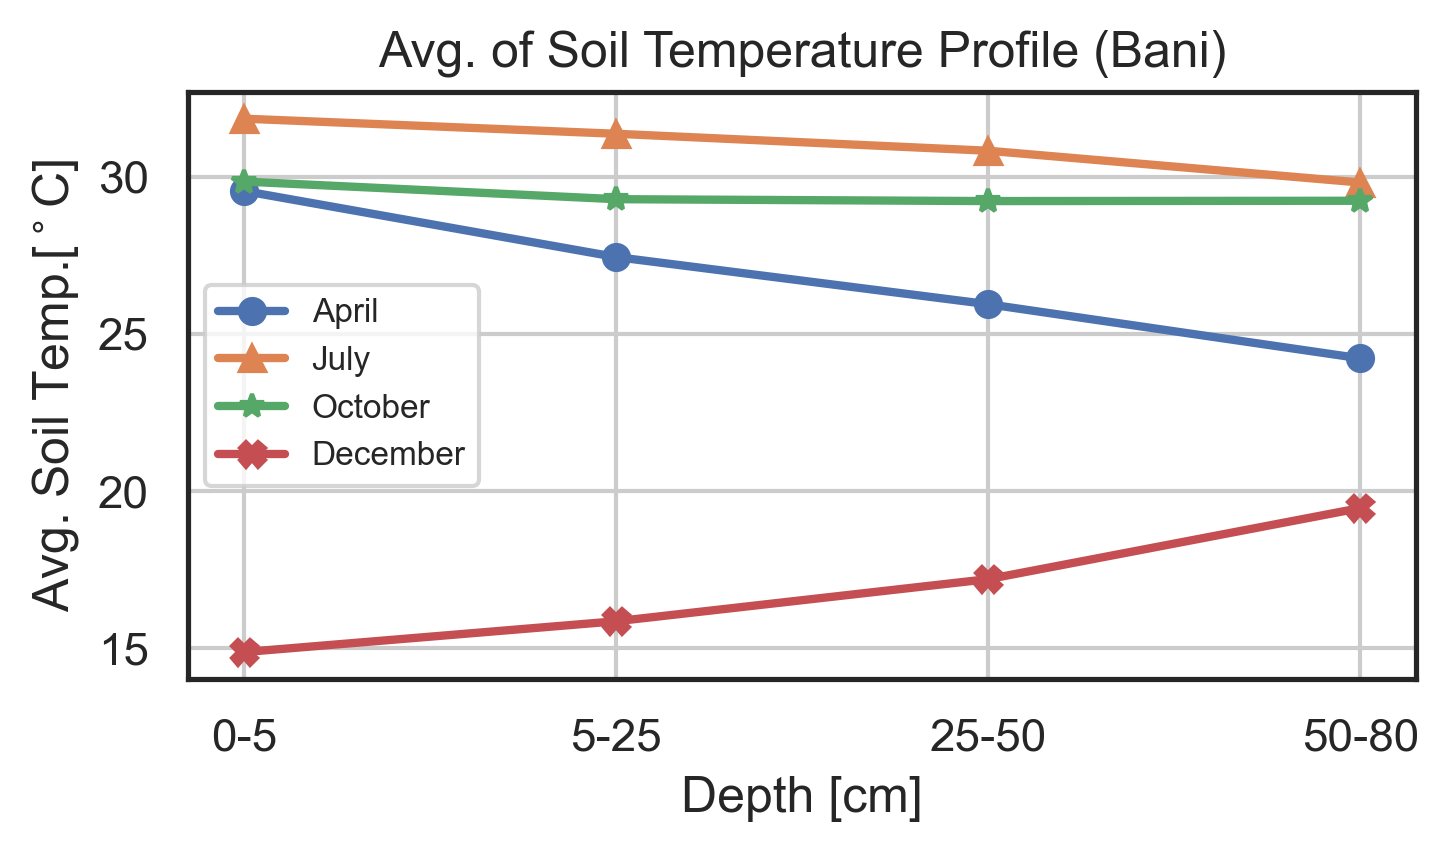

In [151]:
plt.figure(figsize = (5, 3), dpi = 300)
plt.plot(Bani_ST_profile_PRM.Depth, Bani_ST_profile_PRM.Mean,'-o', lw = 2,
         label = 'April')
plt.plot(Bani_ST_profile_M.Depth, Bani_ST_profile_M.Mean,'-^', lw = 2,
         label = 'July')
plt.plot(Bani_ST_profile_PSM.Depth, Bani_ST_profile_PSM.Mean, '-*', lw = 2, 
        label = 'October')
plt.plot(Bani_ST_profile_WTR.Depth, Bani_ST_profile_WTR.Mean, '-X', lw = 2,
         label = 'December')
plt.xlabel('Depth [cm]')
plt.ylabel('Avg. Soil Temp.[$^\circ$C]')
plt.title('Avg. of Soil Temperature Profile (Bani)')
plt.tight_layout()
plt.grid()
plt.legend(prop={'size': 8});